# 1. Load libraries and data

### 1.1. Import Libraries

In [32]:
import pandas as pd
import numpy as np

import matplotlib
import matplotlib.pyplot as plt

from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.cluster import KMeans

# MODELS
from sklearn import linear_model
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier

# ERROR METRICS
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import plot_confusion_matrix
from sklearn.metrics import cohen_kappa_score
from sklearn.metrics import classification_report

import pickle

In [2]:
pd.options.display.max_columns = None
pd.options.display.max_rows = None

### 1.2. Load data

In [3]:
data_import = pd.read_csv('W9 - ProjectData_3-int30.csv')
data_import.head()

,station_name,month,day_of_week,holiday,time_type,malfunction_cause,malfunction_cause_group,rain_bins,wind_bins,temp_bins,duration_30min_intervals
0,Almere Oostvaarders,January,Tuesday,holiday,peak,vandalism,external,medium,medium,chilly,f
1,Lelystad Centrum,January,Tuesday,holiday,peak,vandalism,external,medium,medium,chilly,f
2,Ermelo,January,Tuesday,holiday,peak,signal failure,infrastructure,medium,medium,chilly,a
3,Harderwijk,January,Tuesday,holiday,peak,signal failure,infrastructure,medium,medium,chilly,a
4,Putten,January,Tuesday,holiday,peak,signal failure,infrastructure,medium,medium,chilly,a


# 2. EDA

### 2.1. Data exploration

In [4]:
print("DATA SHAPE IS: ", data_import.shape)
print("")
print ("DATA DTYPES ARE: ") 
data_import.dtypes

DATA SHAPE IS:  (19041, 11)

DATA DTYPES ARE: 


station_name                object
month                       object
day_of_week                 object
holiday                     object
time_type                   object
malfunction_cause           object
malfunction_cause_group     object
rain_bins                   object
wind_bins                   object
temp_bins                   object
duration_30min_intervals    object
dtype: object

### 2.2. Checking for null values 
* there shouldn't be any, since this dataset was saved after cleaning.

### 2.3. Changing dtypes

* Not necessary

### 2.4. Dropping columns

In [5]:
data_import.columns

Index(['station_name', 'month', 'day_of_week', 'holiday', 'time_type',
       'malfunction_cause', 'malfunction_cause_group', 'rain_bins',
       'wind_bins', 'temp_bins', 'duration_30min_intervals'],
      dtype='object')

In [6]:
data = data_import.drop(['malfunction_cause_group'], axis = 1)

In [7]:
data.head()

,station_name,month,day_of_week,holiday,time_type,malfunction_cause,rain_bins,wind_bins,temp_bins,duration_30min_intervals
0,Almere Oostvaarders,January,Tuesday,holiday,peak,vandalism,medium,medium,chilly,f
1,Lelystad Centrum,January,Tuesday,holiday,peak,vandalism,medium,medium,chilly,f
2,Ermelo,January,Tuesday,holiday,peak,signal failure,medium,medium,chilly,a
3,Harderwijk,January,Tuesday,holiday,peak,signal failure,medium,medium,chilly,a
4,Putten,January,Tuesday,holiday,peak,signal failure,medium,medium,chilly,a


* From testing out both options, I have found that the models improve when the malfunction cause is more detailed (i.e. malfunction_cause instead of malfunction_cause_group). This makes sense, since the average times differ between different causes within groups. 

### 2.5. Divide data into dependent and independent variables

In [9]:
y = data[['duration_30min_intervals']]
X_prep = data.drop(['duration_30min_intervals'], axis=1)

In [10]:
y.head()

,duration_30min_intervals
0,f
1,f
2,a
3,a
4,a


### 2.6. One Hot Encoder

In [11]:
cat = X_prep.columns
x = [j for i in cat for j in X_prep[i].unique()[1:]]

### ONE HOT ENCODING for categorical data
from sklearn.preprocessing import OneHotEncoder
encoder_30 = OneHotEncoder(handle_unknown='error', drop='first').fit(X_prep)
encoded = encoder_30.transform(X_prep).toarray()
X = pd.DataFrame(encoded , columns = x)
X.head()

,Lelystad Centrum,Ermelo,Harderwijk,Putten,Culemborg,Geldermalsen,Houten Castellum,Amersfoort Centraal,Amersfoort Schothorst,Amersfoort Vathorst,'t Harde,Nijkerk,Nunspeet,Wezep,Zwolle,Gouda,Gouda Goverwelle,Woerden,Groningen Noord,Sauwerd,Schiphol Airport,Beesd,Leerdam,Kapelle-Biezelinge,Goes,Kruiningen-Yerseke,Hoofddorp,Leiden Centraal,Nieuw Vennep,Sassenheim,Coevorden,Dalen,Emmen,Emmen Zuid,Utrecht Centraal,Utrecht Terwijde,Vleuten,Utrecht Leidsche Rijn,Almelo,Wierden,Kaldenkirchen,Mönchengladbach Hbf,Viersen,Venlo,Boisheim,Breyell,Dülken,Breda,Rotterdam Centraal,Utrecht Overvecht,Den Haag Mariahoeve,Den Haag Laan v NOI,Driebergen-Zeist,Ede-Wageningen,Veenendaal-De Klomp,Maarn,Barneveld Centrum,Barneveld Noord,Ede Centrum,Lunteren,Hoevelaken,Barneveld Zuid,Arnhem Centraal,Bunnik,Oosterbeek,Wolfheze,Utrecht Vaartsche Rijn,Apeldoorn,Apeldoorn Osseveld,Deventer,Twello,'s-Hertogenbosch,Tilburg,Best,Boxtel,Eindhoven Centraal,Vught,Eindhoven Strijp-S,Dordrecht,Dordrecht Zuid,Oudenbosch,Roosendaal,Lage Zwaluwe,Zevenbergen,Hoogeveen,Meppel,Baarn,Hilversum,Bad Bentheim,Oldenzaal,Amsterdam Centraal,Amsterdam Muiderpoort,Amsterdam Science Park,Bussum Zuid,Diemen,Naarden-Bussum,Weesp,Hilversum Media Park,Veenendaal Centrum,Veenendaal West,Dalfsen,Gramsbergen,Hardenberg,Mariënberg,Ommen,Barendrecht,Rotterdam Lombardijen,Rotterdam Blaak,Rotterdam Stadion,Rotterdam Zuid,Zwijndrecht,Amsterdam Lelylaan,Amsterdam Sloterdijk,Tegelen,Helmond,Helmond Brandevoort,Helmond 't Hout,Hengelo,Hengelo Oost,Osnabrück Hbf,Rheine,Blerick,Venray,Nijmegen,Nijmegen Dukenburg,Wijchen,Nijmegen Goffert,Etten-Leur,Arnhem Velperpoort,Duiven,Emmerich,Zevenaar,Westervoort,Diemen Zuid,Oisterwijk,Arnhem Zuid,Elst,Nijmegen Lent,Bodegraven,Dronten,Den Helder,Den Helder Zuid,Delft,Delft Campus,De Vink,Den Haag HS,Den Haag Centraal,Den Haag Moerwijk,Rijswijk,Schiedam Centrum,Voorschoten,Amsterdam Zuid,Duivendrecht,Amsterdam RAI,Houten,Utrecht Lunetten,Echt,Roermond,Susteren,Sittard,Weert,Reuver,Swalmen,Leeuwarden,Mantgum,Sneek,Sneek Noord,Groningen Europapark,Groningen,Hoogezand-Sappemeer,Kropswolde,Martenshoek,Sappemeer Oost,Zuidbroek,Boxmeer,Cuijk,Mook Molenhoek,Nijmegen Heyendaal,Vierlingsbeek,Almere Centrum,Almere Buiten,Almere Parkwijk,Antwerpen-Centraal,Rijssen,Akkrum,Grou-Jirnsum,Heerenveen,Steenwijk,Wolvega,Heerenveen IJsstadion,Almelo de Riet,Borne,Enschede,Nijverdal,Raalte,Enschede Kennispark,Deventer Colmschate,Holten,Delden,Goor,Lochem,Zutphen,Hengelo Gezondheidspark,Arkel,Dordrecht Stadspolders,Hardinxveld-Giessendam,Gorinchem,Sliedrecht,Boven-Hardinxveld,Sliedrecht Baanhoek,Hardinxveld Blauwe Zoom,Breukelen,Maarssen,Utrecht Zuilen,Brummen,Dieren,Rheden,Breda-Prinsenbeek,Heemstede-Aerdenhout,Hillegom,Haarlem,Voorhout,Haarlem Spaarnwoude,Halfweg-Zwanenburg,Apeldoorn De Maten,Klarenbeek,Voorst-Empe,Alphen a/d Rijn,Boskoop,Waddinxveen,Waddinxveen Noord,Boskoop Snijdelwijk,Waddinxveen Triangel,Zaltbommel,Gilze-Rijen,Tilburg Reeshof,Tilburg Universiteit,'s-Hertogenbosch Oost,Oss,Oss West,Rosmalen,Almere Muziekwijk,Almere Poort,Deurne,Helmond Brouwhuis,Horst-Sevenum,Purmerend Overwhere,Purmerend,Purmerend Weidevenne,Zaandam,Zaandam Kogerveld,Assen,Beilen,Haren,Heerlen,Heerlen Woonboulevard,Klimmen-Ransdaal,Meerssen,Maastricht,Houthem-St. Gerlach,Schin op Geul,Voerendaal,Valkenburg,Maastricht Noord,Essen (B),Eijsden,Maastricht Randwyck,Amsterdam Amstel,Amsterdam Bijlmer ArenA,Krommenie-Assendelft,Uitgeest,Wormerveer,Koog aan de Zaan,Zaandijk Zaanse Schans,Heerhugowaard,Schagen,Alkmaar,Castricum,Heiloo,Abcoude,Amsterdam Holendrecht,Hoorn,Lichtenvoorde-Groenlo,Ruurlo,Vorden,Leiden Lammenschans,Geleen Oost,Hoensbroek,Nuth,Spaubeek,Schinnen,Bad Nieuweschans,Weener,Winschoten,Didam,Doetinchem,Doetinchem De Huet,Wehl,Antwerpen-Luchtbal,Antwerpen-Noorderdokken,Heide (B),Kalmthout,Kapellen,Kijkuit,Ekeren,Sint-Mariaburg,Wildert,Bilthoven,Den Dolder,Anna Paulowna,Den Haag Ypenburg,Zoetermeer,Beverwijk,Driehuis,Santpoort Noord,Bovenkarspel Flora,Bovenkarspel-Grootebroek,Enkhui

In [12]:
with open('encoder_30.pickle', 'wb') as f:
    pickle.dump(encoder_30, f)

### 2.7. Last check of X and y

In [13]:
y.shape

(19041, 1)

In [14]:
X.shape

(19041, 529)

# 3. Model

### 3.1. Train-Test split

In [15]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=100)

## 3.2. Model 1 - Logistic Regression

In [16]:
classification = LogisticRegression(random_state=0, solver='lbfgs',
                  multi_class='ovr').fit(X_train, y_train)

C:\Users\yelam\anaconda3\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
C:\Users\yelam\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\yelam\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or s

In [17]:
predictions = classification.predict(X_test)

The accuracy of the model on test set is: 0.32 
[[725 475  67  47  35  25   9   2   1   2]
 [560 628 112  44  69  25  16   5   0   1]
 [218 234 121  57  64  40  22  11   5   0]
 [143 154  71 103  47  26  31   7   3   1]
 [ 88 102  59  39 116  52  19   3   2   0]
 [ 52  74  44  24  56  50  37  12   6   0]
 [ 39  66  35  35  28  44  58   9   6   1]
 [ 28  21  19  14  22  23  16  25   7   0]
 [ 11  16  15  12  14   8  15   2  17   0]
 [ 10  13   9  11   8   6   9   0   0   0]]


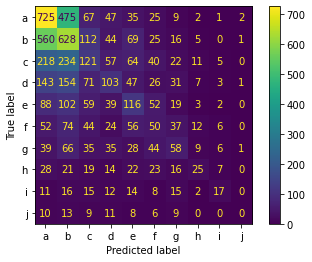

The Kappa of your model is: 0.16


In [18]:
print("The accuracy of the model on test set is: %4.2f " % accuracy_score(y_test, predictions))
print(confusion_matrix(y_test, predictions))
plot_confusion_matrix(classification, X_test, y_test)  # doctest: +SKIP
plt.show()  # doctest: +SKIP
print("The Kappa of your model is: %4.2f" % (cohen_kappa_score(y_test, predictions)))

In [19]:
print(classification_report(y_test, predictions, labels=['a', 'b', 'c', 'd', 'e', 'f', 'g', 'k']))

              precision    recall  f1-score   support

           a       0.39      0.52      0.44      1388
           b       0.35      0.43      0.39      1460
           c       0.22      0.16      0.18       772
           d       0.27      0.18      0.21       586
           e       0.25      0.24      0.25       480
           f       0.17      0.14      0.15       355
           g       0.25      0.18      0.21       321
           k       0.00      0.00      0.00         0

   micro avg       0.32      0.34      0.33      5362
   macro avg       0.24      0.23      0.23      5362
weighted avg       0.31      0.34      0.31      5362



C:\Users\yelam\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\yelam\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


## 3.3. Model 2 - KNN

In [20]:
#from sklearn.cluster import KMeans

#K = range(2, 20)
#inertia = []

#for k in K:
#    kmeans = KMeans(n_clusters=k,
#                    random_state=1234)
#    kmeans.fit(X_train)
#    inertia.append(kmeans.inertia_)

#import numpy as np
#import matplotlib.pyplot as plt
#%matplotlib inline

#plt.figure(figsize=(16,8))
#plt.plot(K, inertia, 'bx-')
#plt.xlabel('k')
#plt.ylabel('inertia')
#plt.xticks(np.arange(min(K), max(K)+1, 1.0))
#plt.title('Elbow Method showing the optimal k')

In [21]:
neigh = KNeighborsClassifier(n_neighbors=3).fit(X_train, y_train)
predict = neigh.predict(X_test)

<ipython-input-21-97c7a8a2d8f1>:1: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  neigh = KNeighborsClassifier(n_neighbors=3).fit(X_train, y_train)


The accuracy of the model on test set is: 0.62 
[[952 262  75  35  28   7  14   7   5   3]
 [337 933  98  48  25  11   5   2   0   1]
 [164 120 433  31   7  10   2   5   0   0]
 [ 92  81  41 326  23  10   6   3   0   4]
 [ 72  44  22  36 271  22   7   4   1   1]
 [ 24  38  15  18  19 219   8  13   1   0]
 [ 33  32   5  10  12  18 204   5   2   0]
 [ 27  12  14   3   1   7  11  91   9   0]
 [ 16   7  10   5   4   5   0   7  56   0]
 [ 12   5   5   0   0   1   0   1   0  42]]


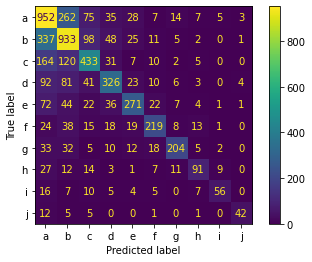

The Kappa of your model is: 0.53


In [22]:
print("The accuracy of the model on test set is: %4.2f " % accuracy_score(y_test, predict))
print(confusion_matrix(y_test, predict))
plot_confusion_matrix(neigh, X_test, y_test)  # doctest: +SKIP
plt.show()  # doctest: +SKIP
print("The Kappa of your model is: %4.2f" % (cohen_kappa_score(y_test, predict)))

In [23]:
print(classification_report(y_test, predict, labels=['a','b','c','d','e','f','g','h','i','j']))

              precision    recall  f1-score   support

           a       0.55      0.69      0.61      1388
           b       0.61      0.64      0.62      1460
           c       0.60      0.56      0.58       772
           d       0.64      0.56      0.59       586
           e       0.69      0.56      0.62       480
           f       0.71      0.62      0.66       355
           g       0.79      0.64      0.71       321
           h       0.66      0.52      0.58       175
           i       0.76      0.51      0.61       110
           j       0.82      0.64      0.72        66

    accuracy                           0.62      5713
   macro avg       0.68      0.59      0.63      5713
weighted avg       0.63      0.62      0.62      5713



## 3.4. Model 3 - Random Forest

In [24]:
clf = RandomForestClassifier(n_estimators=100).fit(X_train, y_train)
pred = clf.predict(X_test)

<ipython-input-24-be64b4b0ac71>:1: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  clf = RandomForestClassifier(n_estimators=100).fit(X_train, y_train)


* I will save the model into a pickle file to apply it later on user input to return predictions

In [25]:
with open('W9-project-model-class-30-ohe.pkl', 'wb') as file:
    pickle.dump(clf, file)

The accuracy of the model on test set is: 0.66 
[[ 956  249   65   49   22   11   18    8    6    4]
 [ 245 1004  101   64   18   14   10    2    1    1]
 [ 131  103  479   28    9    8    4   10    0    0]
 [  54   63   44  367   29   12   14    2    0    1]
 [  32   33   23   34  320   22    7    7    0    2]
 [  17   26   17   11   20  230   15   16    3    0]
 [  19   18    4    3   16   29  225    6    1    0]
 [  19   15    9    1    1    6   12  106    6    0]
 [  12    5    9    3    5    4    0   12   58    2]
 [   6    7    4    0    0    0    0    1    1   47]]


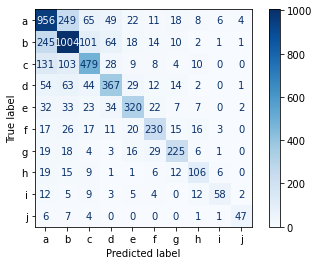

The Kappa of your model is: 0.59


In [28]:
print("The accuracy of the model on test set is: %4.2f " % accuracy_score(y_test, pred))
print(confusion_matrix(y_test, pred))
plot_confusion_matrix(clf, X_test, y_test, cmap=plt.cm.Blues)  # doctest: +SKIP
plt.savefig('confusion_matrix_class_30.png', dpi=300, bbox_inches='tight')
plt.show()  # doctest: +SKIP
print("The Kappa of your model is: %4.2f" % (cohen_kappa_score(y_test, pred)))

In [29]:
print(classification_report(y_test, pred, labels=['a','b','c','d','e','f','g','h','i','j']))

              precision    recall  f1-score   support

           a       0.64      0.69      0.66      1388
           b       0.66      0.69      0.67      1460
           c       0.63      0.62      0.63       772
           d       0.66      0.63      0.64       586
           e       0.73      0.67      0.70       480
           f       0.68      0.65      0.67       355
           g       0.74      0.70      0.72       321
           h       0.62      0.61      0.61       175
           i       0.76      0.53      0.62       110
           j       0.82      0.71      0.76        66

    accuracy                           0.66      5713
   macro avg       0.70      0.65      0.67      5713
weighted avg       0.67      0.66      0.66      5713

